In [ ]:
Hypothesis Testing
---------------------
population ->sample data (sampling) ->analysis 
----------
products -> N 
ecommerce -> visits (N - no.of customers)

Null Hypothesis (Ho) 
---------------------
Alternate Hypothesis (H1 (or) Ha)
------------------------------------
Hypothesis - terms
--------------------
P-value 
level of significance (alpha symbol) 
a=0.05 ->5% ->95%
a=0.01 ->1% ...
a=0.10 -> 10%
critical value - threshold value 

p-value <= alpha - reject Ho
----------------
p-value >= alpha - fail to reject Ho 
----------------

alpha = 0.05 
alpha = 0.01

1.T-test - sample data is less than 30 - std_deviation - unknown
           ----------------------------
             Compare means of 1 or 2 groups - avg test score of 2student groups (or) 2dept groups 


2. ANOVA (analysis of variance) - 3 or more samples (groups)
    |->one-way anova - mean <=> more than 2 groups 
    |->two-way anova - mean <=> two independent variables 
              Compare means of 3 or more groups - avg test score of 3student groups
       

3. chi-square test - use: categorical variables
        <Male>     Tea Coffee
        <female>   Tea Coffee
        Test - if gender is likes to drink Tea/Coffee 

4. Z-test sample data large data ( sample data >30) - std_deviation - known
     avg_test for students is 90 <== 100's students(sample)
       Compare means of 1 or 2 groups # (large data - population)
       ex: average height of a city/country 


In [ ]:
                Tea               Coffee 
Male             30                 20    => 50  
Female           20                 30    => 50
              -------             ------
                  50                50    => 100

step 1: define Hypothesis 
step 2: frequency
step 3: calculate chi-square
step 4: df  
step 5: determine the criticalvalue - decision
step 6: final statement 


step 1: define Hypothesis 
         Ho - There is no difference between gender and drink preference (variables - independent) 
         H1 - There is a difference between gender and drink preference  (variables - dependent)
step 2: frequency
             (Row Total ) X ( Column Total)
         E =    ---------------------------
                       GrandTotal
         E =  50 x 50
               ------  = 25
                 100 
         E-male-coffee 
         E-male-tea
         E-female-coffe
         E-female-tea
step 3: calculate chi-square
          O - observed frequency 
          E -expected frequency 
                  (O-E)2
                ----------
                   E

            For-male-coffee =>  (20 - 25) /25 => 5(squre) /25 => 25/25 = 1 

step 4: df  
         df = (r -1 ) x (c-1) 
         df = 2-1 x 2-1 => 1 X 1 =>1 
            ..
        sum of all values => 1+1+1+1 = 4
step 5: determine the criticalvalue - decision
                df=1 
                df -1 ->0.05 => 3.841
                4 > 3.841
               ---------//reject the null hypothesis

step 6: final statement 
     


In [1]:
import numpy as np
from scipy import stats

In [3]:
# ANOVA
group1 = [85,88,84,90,92]
group2 = [80,85,79,78,85]
group3 = [95,93,96,91,94]

stats.f_oneway(group1,group2,group3)

F_onewayResult(statistic=22.015267175572514, pvalue=9.650257252191657e-05)

In [5]:
f_statistic,p_value = stats.f_oneway(group1,group2,group3)

alpha = 0.05
if(p_value <alpha):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [ ]:
Load the dataset - population ->random sampling
data cleaning
outlier detection
describe data 
EDA
  |->Uni-variate analysis
  |->Bi-variate analysis
  |->multivariate analysis

statistical Testing
      ANOVA Test - 3 more groups 
      Chi-Square test - categorical
      t-test - mean of two groups
      z-test 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,f_oneway

In [11]:

df = sns.load_dataset('titanic') # Load the dataset - population 
print(df.shape)

sample_df = df.sample(n=30) # random sampling
print(sample_df.shape)

(891, 15)
(30, 15)


In [13]:
# replace empty value 
sample_df['age'].fillna(df['age'].median(),inplace=True)

sample_df['deck'].fillna(df['deck'].mode()[0],inplace=True)

C:\Users\theeba\AppData\Local\Temp\ipykernel_19608\2583022747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_df['age'].fillna(df['age'].median(),inplace=True)
C:\Users\theeba\AppData\Local\Temp\ipykernel_19608\2583022747.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [15]:
empty_values = sample_df.isnull().sum()
print(empty_values)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [17]:
# drop duplicates
sample_df.drop_duplicates(inplace=True)

In [19]:
# remove duplicates 
n=sample_df.duplicated().sum()
print(f'there is {n} duplicate record')

there is 0 duplicate record


In [21]:
z_scores = zscore(sample_df['age'])


In [23]:
outliers = np.where(np.abs(z_scores) >1.99)
sample_df.index

Index([790, 725, 465, 308, 799, 227, 619, 839, 166, 561, 455, 754, 739, 224,
       646, 122, 297, 831, 681, 464, 387, 678,  16, 573,  21, 437,   4, 587,
       242],
      dtype='int64')

In [25]:
sample_df[np.abs(z_scores) >1.99]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
297,0,1,female,2.00,1,2,151.550,S,First,child,False,C,Southampton,no,False
831,1,2,male,0.83,1,1,18.750,S,Second,child,False,C,Southampton,yes,False
16,0,3,male,2.00,4,1,29.125,Q,Third,child,False,C,Queenstown,no,False
587,1,1,male,60.00,1,1,79.200,C,First,man,True,B,Cherbourg,yes,False


In [27]:
sample_df.describe() # summary statistics

,survived,pclass,age,sibsp,parch,fare
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.413793,2.275862,28.683793,0.517241,0.620690,30.071403
std,0.501230,0.797162,12.636610,0.870988,1.293218,33.903486
min,0.000000,1.000000,0.830000,0.000000,0.000000,7.050000
25%,0.000000,2.000000,26.000000,0.000000,0.000000,7.895800
50%,0.000000,2.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,35.000000,1.000000,1.000000,30.070800
max,1.000000,3.000000,60.000000,4.000000,6.000000,151.550000


<Axes: xlabel='age', ylabel='Count'>

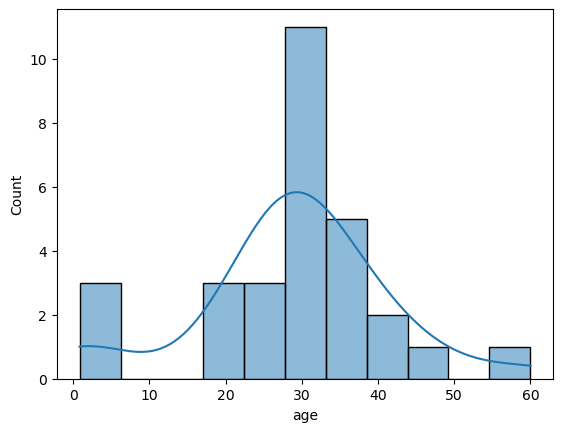

In [29]:
# Univariate analysis
sns.histplot(sample_df['age'],kde=True)

<Axes: xlabel='sex', ylabel='count'>

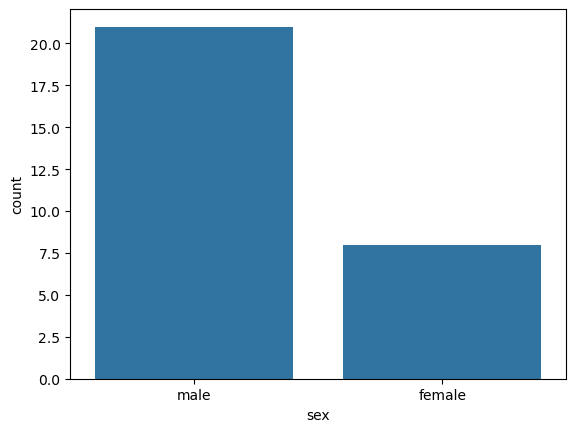

In [31]:
sns.countplot(x='sex',data=sample_df)

<Axes: xlabel='sex', ylabel='count'>

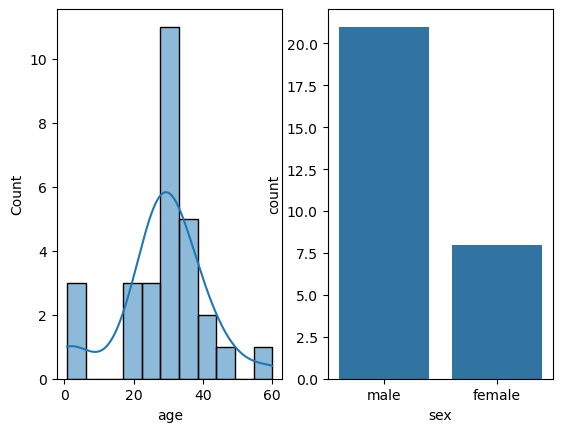

In [33]:
plt.subplot(1,2,1)
sns.histplot(sample_df['age'],kde=True)
plt.subplot(1,2,2)
sns.countplot(x='sex',data=sample_df)

<Axes: xlabel='pclass', ylabel='fare'>

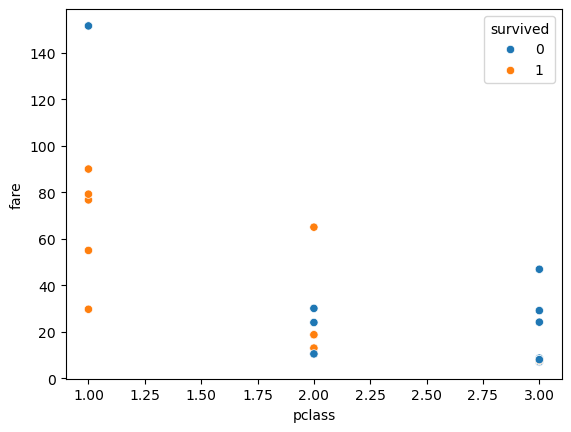

In [35]:
# Bivariate analysis
# two variables
sns.scatterplot(x='pclass',y='fare',data=sample_df,hue='survived')

<Axes: xlabel='age', ylabel='fare'>

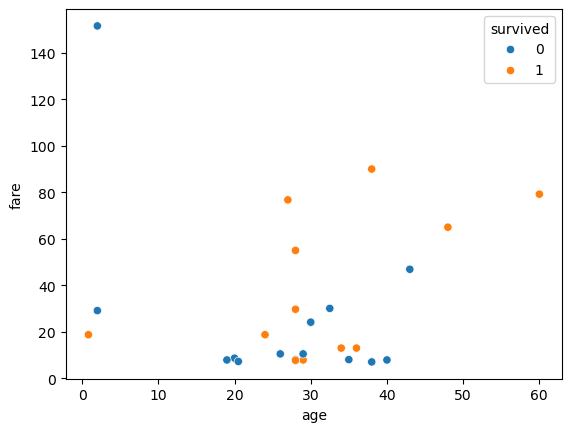

In [37]:
sns.scatterplot(x='age',y='fare',data=sample_df,hue='survived')

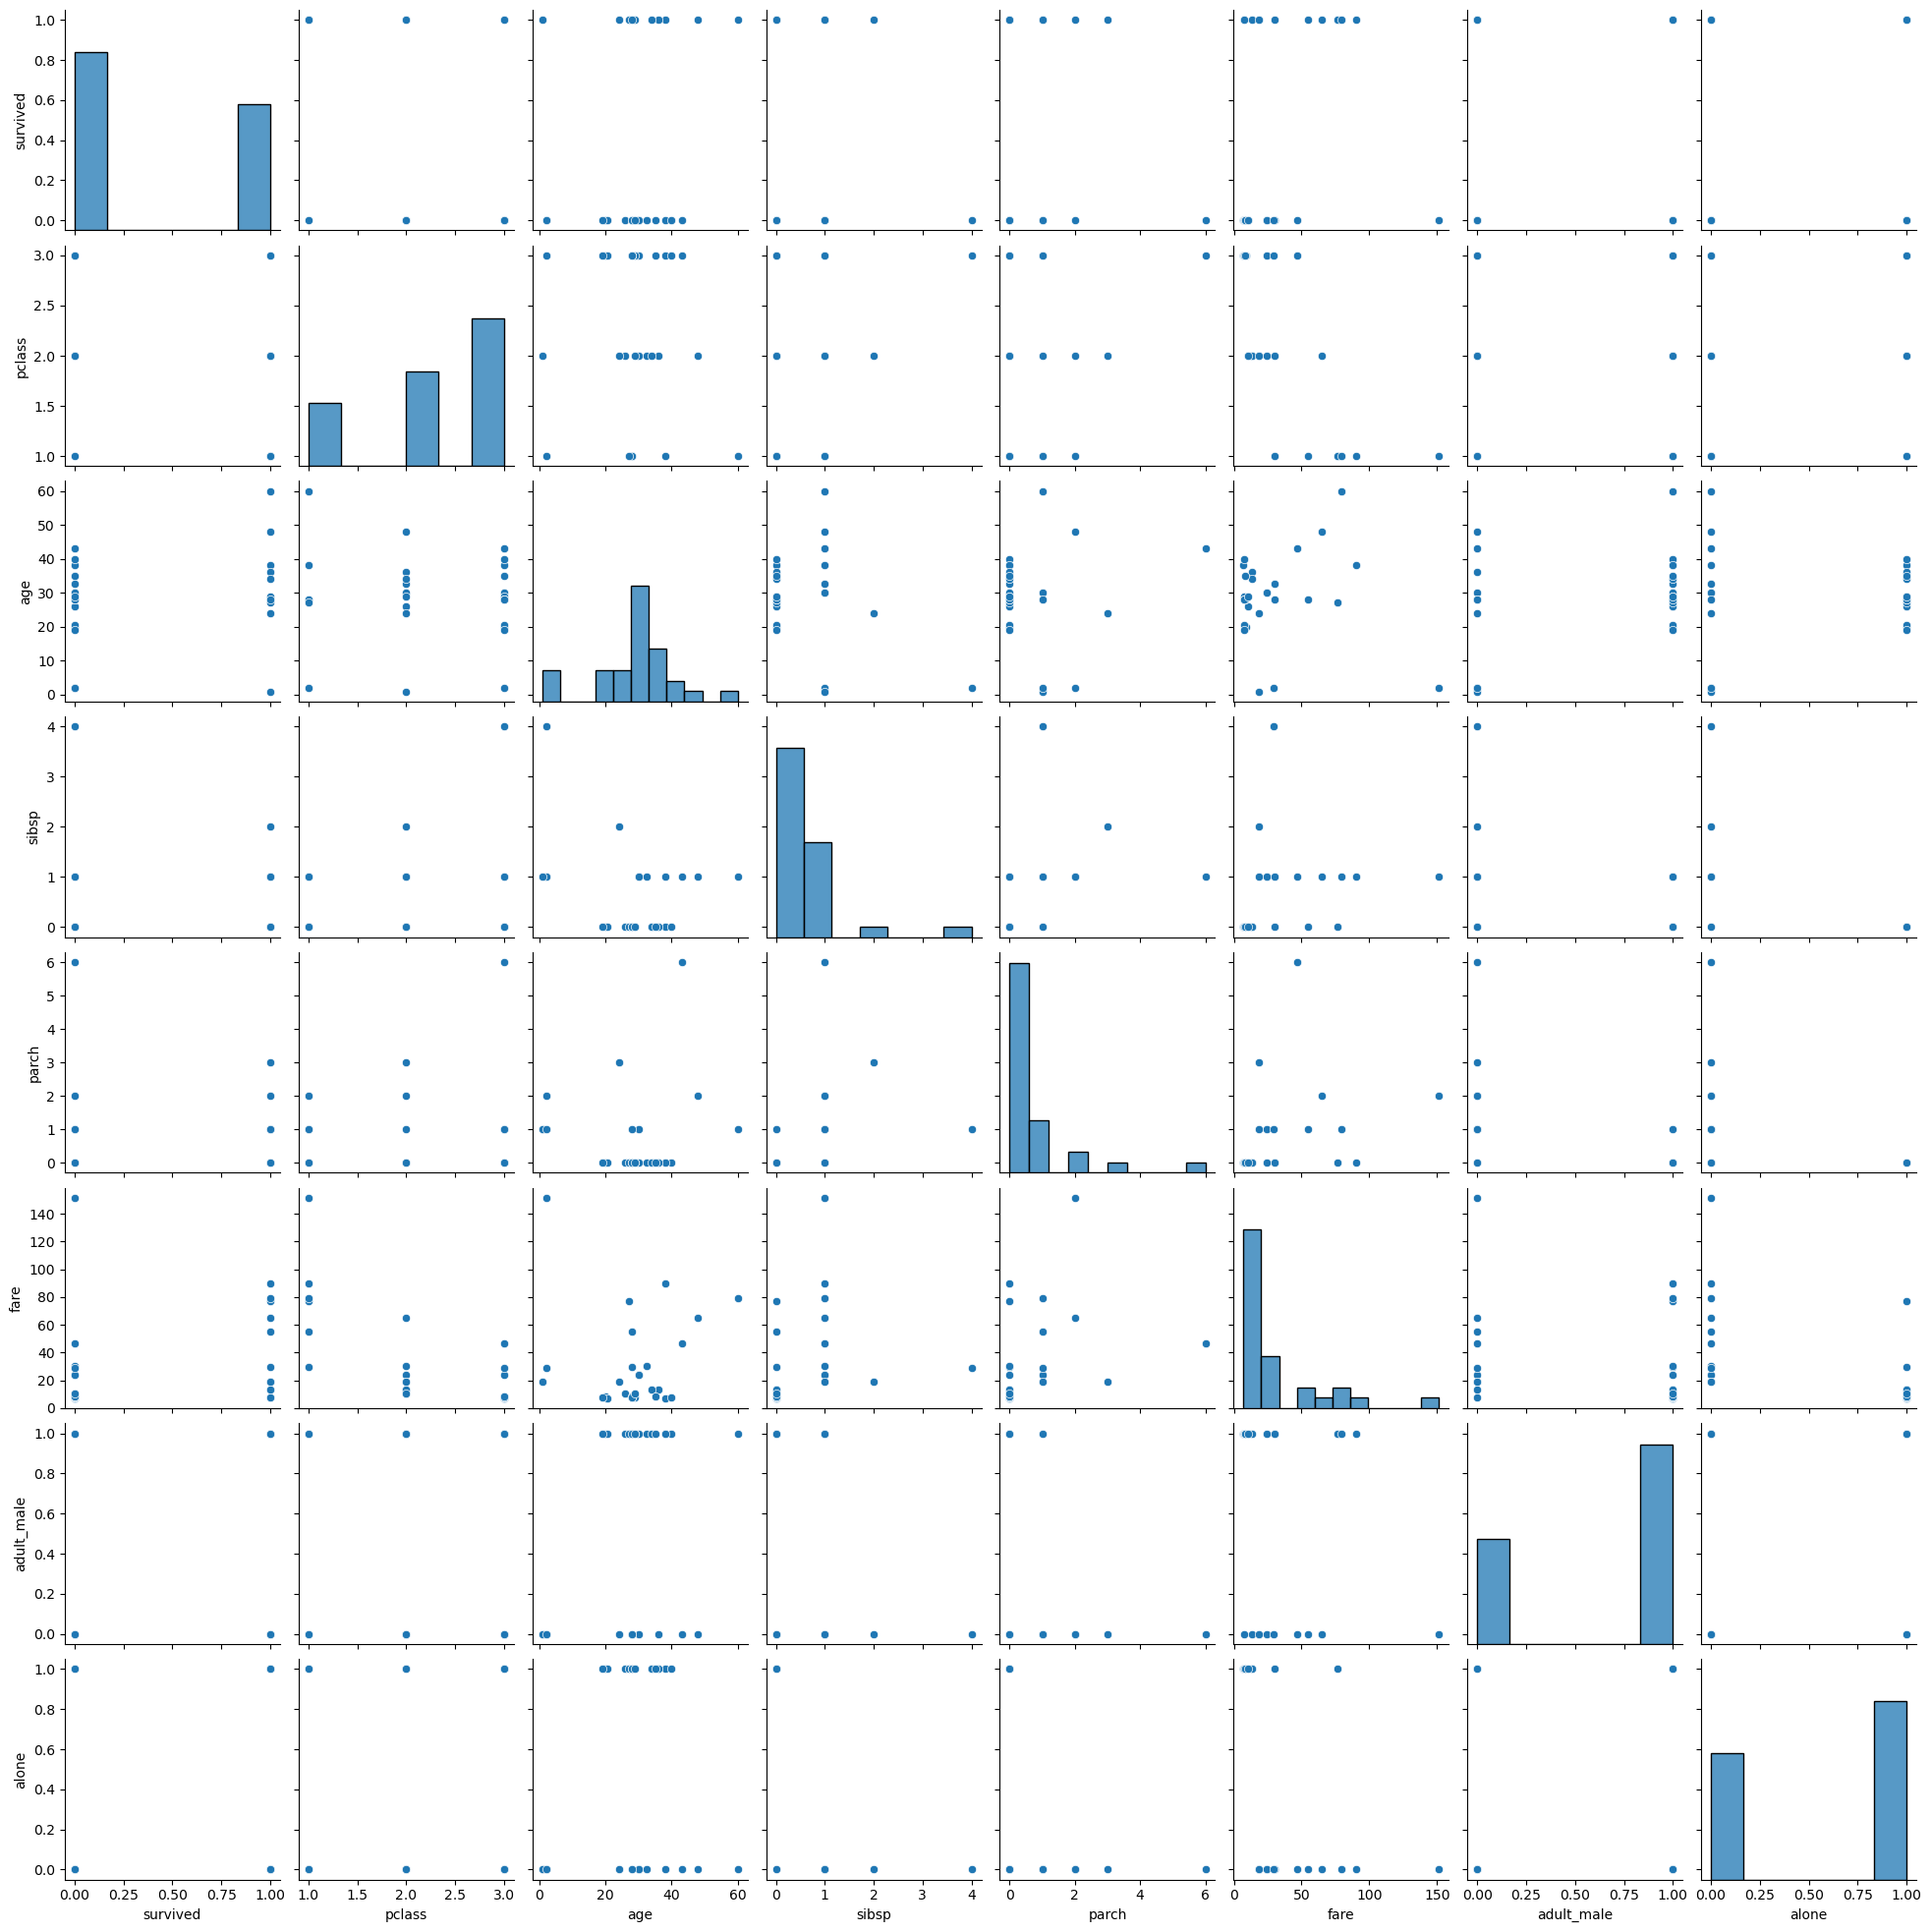

In [39]:
# multivariate analysis
sns.pairplot(sample_df)

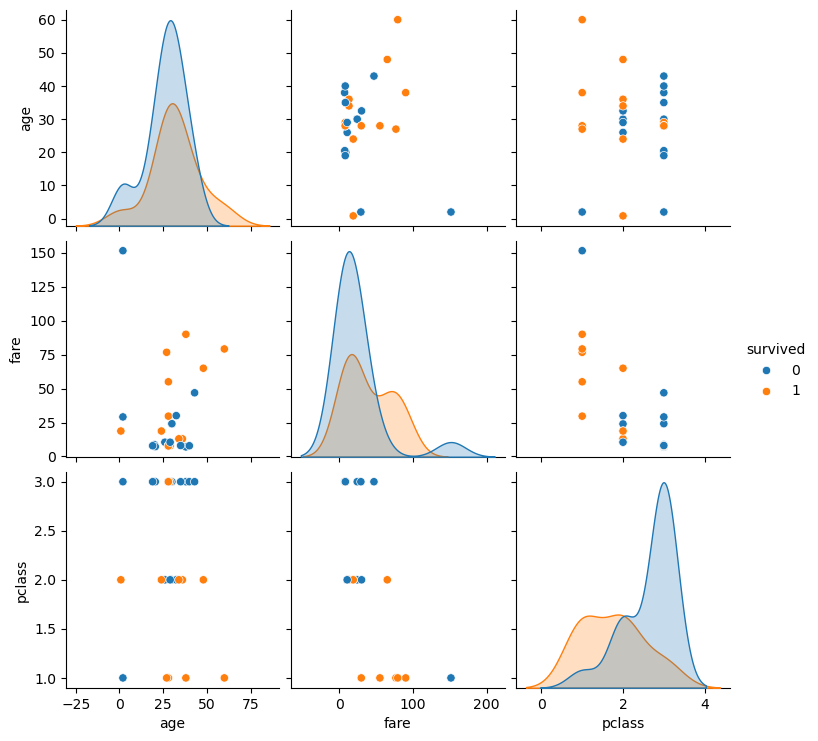

In [41]:
sns.pairplot(sample_df[['survived','age','fare','pclass']],hue='survived')

In [43]:
sample_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
21,1,2,male,34.0,0,0,13.00,S,Second,man,True,D,Southampton,yes,True
437,1,2,female,24.0,2,3,18.75,S,Second,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True
587,1,1,male,60.0,1,1,79.20,C,First,man,True,B,Cherbourg,yes,False
242,0,2,male,29.0,0,0,10.50,S,Second,man,True,C,Southampton,no,True


In [45]:
# Statistical Testing
# ----------------------
from scipy.stats import f_oneway

# Perform ANOVA Test between 'survived' and 'fare'
survived_fares =  sample_df[sample_df['survived'] == 1]['fare']
not_survived_fares = sample_df[sample_df['survived'] == 0]['fare']

# perform ANOVA
f_statistic,p_value = f_oneway(survived_fares,not_survived_fares)
print('Pvalue:',p_value)

Pvalue: 0.21098145720572523


<Axes: xlabel='survived', ylabel='fare'>

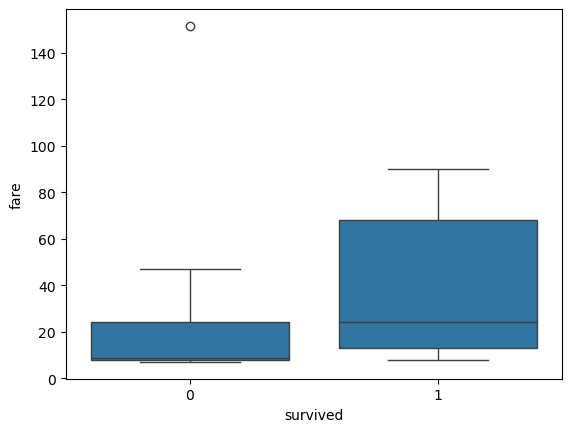

In [47]:
sns.boxplot(x='survived',y='fare',data=sample_df)

In [53]:
from scipy.stats import chi2_contingency
sample_df['survived']
sample_df['sex']
#chi2_contingency(sample_df['survived'],sample_df['sex'])
#help(chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None, *, method=None)
    Chi-square test of independence of variables in a contingency table.

    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::

        dof = observed.size - sum(observed.shape) + observed.ndim - 1


    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [63]:
#help(pd.crosstab)
pd.crosstab(sample_df['survived'],sample_df['sex'])

sex,female,male
survived,,
0,3,14
1,5,7


In [65]:
from scipy.stats import chi2_contingency
survived_sex_df = pd.crosstab(sample_df['survived'],sample_df['sex']) # pandas 
 
chi2_contingency(survived_sex_df)

Chi2ContingencyResult(statistic=1.007155987394958, pvalue=0.3155851417704145, dof=1, expected_freq=array([[ 4.68965517, 12.31034483],
       [ 3.31034483,  8.68965517]]))

In [67]:
chi2_stat,p_val,dof,expected = chi2_contingency(survived_sex_df)
p_val

0.3155851417704145

<Axes: xlabel='survived', ylabel='count'>

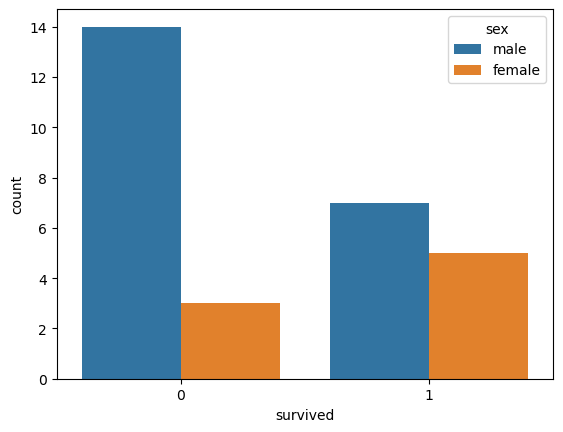

In [69]:
sns.countplot(x='survived',hue='sex',data=sample_df)

In [81]:
# T-test
from scipy.stats import ttest_ind
#help(ttest_ind)

survived_ages = sample_df[sample_df['survived'] == 1 ]['age']
not_survived_ages = sample_df[sample_df['survived'] == 0]['age']

# perform t-test
ttest_ind(survived_ages,not_survived_ages)

TtestResult(statistic=1.096709818284899, pvalue=0.28245384413512775, df=27.0)

Text(0.5, 1.0, 'Distribution of Age by Survival status')

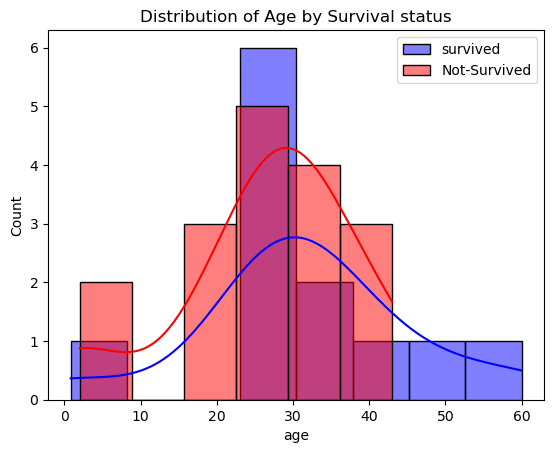

In [87]:
sns.histplot(survived_ages,label='survived',kde=True,color='blue')
sns.histplot(not_survived_ages,label='Not-Survived',kde=True,color='red')
plt.legend()
plt.title('Distribution of Age by Survival status')

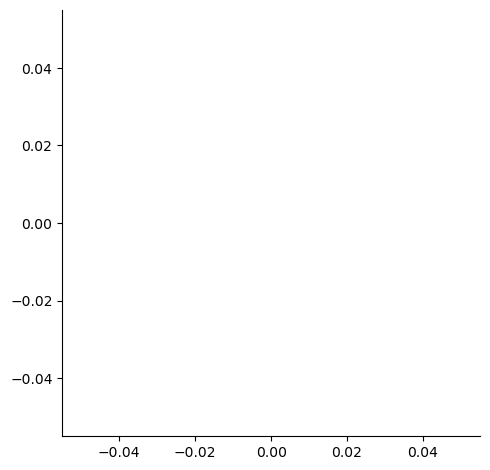

In [95]:
sns.relplot(x=[1,2])

In [99]:
sns.FacetGrid()

TypeError: FacetGrid.__init__() missing 1 required positional argument: 'data'

In [103]:
class box:
    def __init__(self,data):
        pass
box([1,2])

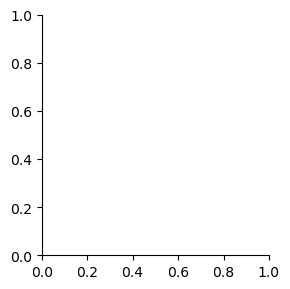

In [105]:
sns.FacetGrid(sample_df)

In [ ]:
import A
def f1(a):
    import B
    class box:
        def __init__(self,a):
            self.a = a
            ...
    obj = box(a)
    return obj
def f2(a):
    B.fx() ->error
    A.fx() ->OK

myobj1 = f1([1,2,3])
myobj1 ->visualization

myobj2 = f1([1,2,3])
myobj2 ->visualization 

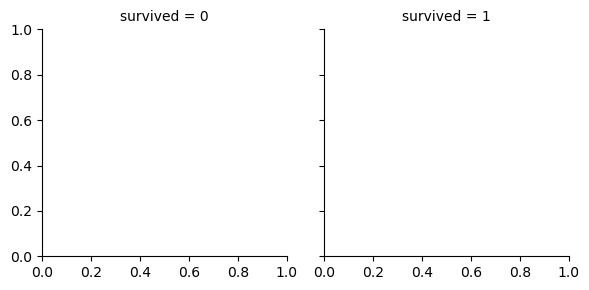

In [107]:
sns.FacetGrid(sample_df,col='survived')

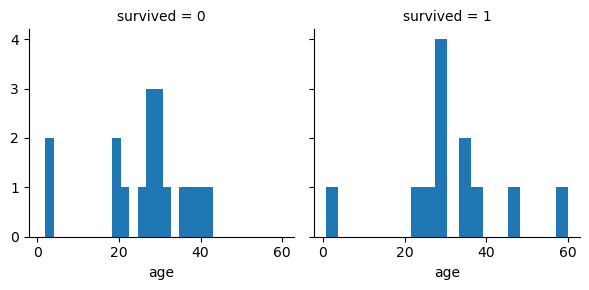

In [111]:
gobj = sns.FacetGrid(sample_df,col='survived')
gobj.map(plt.hist,'age',bins=20)
plt.show()

In [ ]:
|-----------------------------
| AI
|------------------------------
|  ML - 
| --------
| | DL - 
| | ----
| |  |-GenAI
|         |->llm - LPU 
|    

 General Programming
 ---------------------
 user ->input -> m/c ->output 

  Vs
 Machine Learning (ML)
 --------------------
  user -> input & output ->m/c -> Algorithm 


 personA -> 100s books about list dogs details
                                  -------------
            (100s book - data)

 Q1 ->PersonA  ->can answer from 100s books

PersonA + 5more books(load more data/info) => PersonA ...


1984: Q: who is PM india? ______
|
2025: Q: who is PM india? ______


Terms
------
model - ML algorithm -> specific representation learned from data.

feature - individual measurable property of our data

target (or) label - value predicted by our model

training - To give set of inputs(features) ->expected output(label/target) 
           +------------------+
           | (Apple) (banana) |  ->trained //  Apple ->OK  
           +------------------+                banana ->OK
                                               Apple ->Not-Good-trained Model
                                               Apple ->Not-Good-trained Model
                                               |
                                             input((Apple)| |banana| |orange| |banana| <== (unseen data)

prediction - once our model is ready, it can be fed a set of inputs to which it will provide a 
             predicted output(label)

validation - ML model 


Types of ML
-----------
1.supervised learning - model is getting trained on a labelled dataset 
        |->classification |->regression 

2.unsupervised learning - model - unlabelled data
        |->clustering |->association

[3.reinforcement -  reward  - penalty ]

regression
|=>simple linear regression - predict the relationship between two variables 
    y = mx+c
y - dependent variable
x - input variable
m - slope 
c - intercept
  | .    .
Y |.  . 
 -|-----------
  |   X 
 
                                    

In [113]:
from scipy import stats
stats.linregress

<function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>

In [115]:
x = [6,8,9,10,12,15,18,20,25]
y = [100,150,160,190,200,250,340,450,466]
len(x),len(y)

(9, 9)

In [117]:
stats.linregress(x,y)

LinregressResult(slope=20.58071278825996, intercept=-25.047519217330546, rvalue=0.977009614868706, pvalue=5.932004204814082e-06, stderr=1.6974229441680828, intercept_stderr=25.2973605520969)

In [119]:
slope,intercept,r,p,stderr = stats.linregress(x,y)

In [131]:
Y = []
def fx(x):
    return slope*x+intercept # mx+c
    
for var in x:
    r = fx(var)
    Y.append(r)
Y    

[98.4367575122292,
 139.59818308874912,
 160.1788958770091,
 180.75960866526904,
 221.92103424178896,
 283.6631726065688,
 345.40531097134874,
 386.56673654786863,
 489.4703004891684]

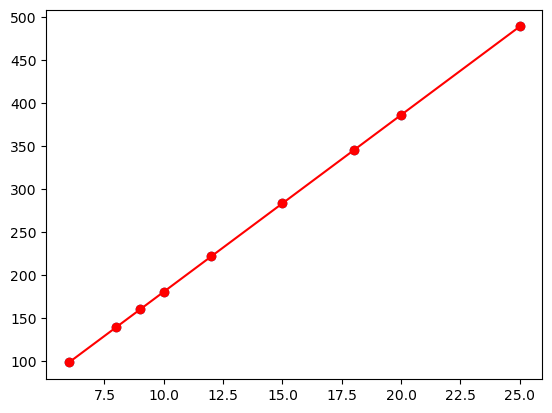

In [133]:
plt.scatter(x,Y)
plt.plot(x,Y,c='r',marker='o')

In [135]:
fx(60)

1209.795248078267

In [137]:
fx(3)

36.69461914744933

In [139]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [141]:
iris_df = sns.load_dataset('iris')
iris = iris_df[['petal_length','petal_width']]
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


In [143]:
X = iris['petal_length']
Y = iris['petal_width']

In [175]:
# from <module> import <member>
# from <dir1>.<dir2>.<module> import <member> 
#
# <member> - className,function,variable etc.,

from sklearn.model_selection import train_test_split
#help(train_test_split)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=24)

In [177]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(y_test).reshape(-1,1)

In [179]:
from sklearn.linear_model import LinearRegression
model_obj = LinearRegression()
model_obj.fit(x_train,y_train)
m = model_obj.intercept_
c = model_obj.coef_

In [181]:
y_pred_train = m * x_train + c
y_pre_train = model_obj.predict(x_train)

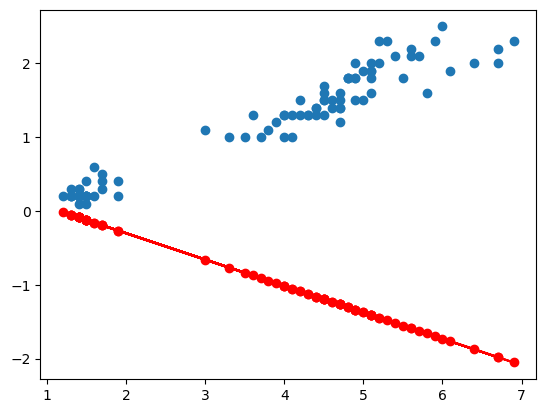

In [183]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train,color='r',marker='o')

In [187]:
## Sample data (x - feature ; y - target)

X_train = np.array([[1],[2],[3],[4],[5]]) # traing data 
Y_train = np.array([10,20,10.5,30.5,3.25]) # actual values 

from sklearn.linear_model import LinearRegression
model_obj = LinearRegression()

# fit the mode to the training data
model_obj.fit(X_train,Y_train)

X_new = np.array([[6],[7]])

m = model_obj.intercept_
c = model_obj.coef_
print("m=",m,"c=",c)
predictions = model_obj.predict(X_new) 
print("A:predictions=",predictions)
y_pred_train = m * X_new + c

m= 15.749999999999998 c= [-0.3]
A:predictions= [13.95 13.65]
B:y_prediction: [[ 94.2 ]
 [109.95]]


In [ ]:
Linear  y = mx + c
polynomial y = Bo + B1x1 + B2X2 + B3X3 ....
 x2 x3 x4 x5 ...
deg = 1  linear regression - straight line
deg = 2  Quadratic regression - parbolic curve
deg = 3 cubic regression - cubic curve (more bends)
High degree -> overfitting  -> noise data
............

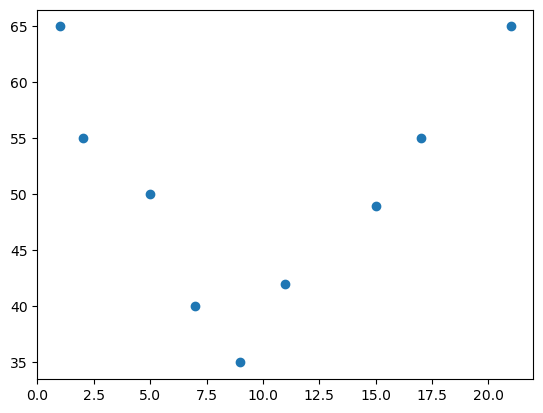

In [189]:
x = [1,2,5,7,9,11,15,17,21]
y = [65,55,50,40,35,42,49,55,65]

model = np.poly1d(np.polyfit(x,y,3)) # a3x3+a2x2..
plt.scatter(x,y)

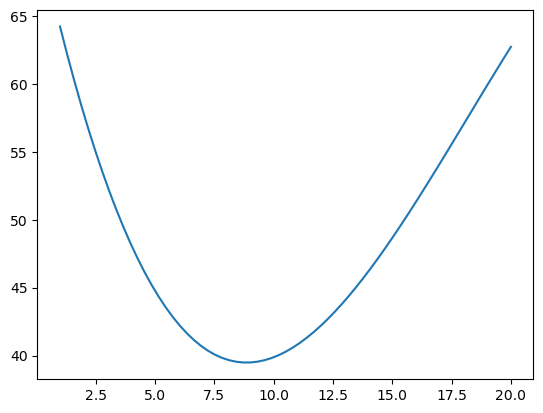

In [201]:
#help(np.linspace)
r=np.linspace(1,20,65)
plt.plot(r,model(r))

In [ ]:
Logistic regression
-------------------
 -> binary classification ( 0s , 1s)
 -> classification algorithm
 -> Sigmoid  - map any value between 0 and 1


load the data
split the data into training and test sets
train a logistic regression model
make predictions on the test set
evaluate the model

In [211]:
Tdf = pd.DataFrame({"K1":['male','female','male','female']})
y_bin = (Tdf['K1'] == 'male').astype(int)
y_bin

0    1
1    0
2    1
3    0
Name: K1, dtype: int32

In [213]:
Tdf['K1']

0      male
1    female
2      male
3    female
Name: K1, dtype: object

In [215]:
Tdf = pd.DataFrame({"K1":['male','female','male','female']})
y_bin = (Tdf['K1'] == 'female').astype(int)
y_bin

0    0
1    1
2    0
3    1
Name: K1, dtype: int32

In [217]:
Tdf = pd.DataFrame({"K1":['male','female','male','female']})
y_bin = (Tdf['K1'] == 'xyz').astype(int)
y_bin

0    0
1    0
2    0
3    0
Name: K1, dtype: int32

In [223]:
#help(Tdf['K1'] == 'xyz').astype(int)

In [225]:
from sklearn.datasets import load_iris

In [235]:
X = load_iris().data # to get the features(sepal length,sepal width,petal length,petal width)
Y = load_iris().target # labels (species)

In [249]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data 
Y = iris.target
#print(len(X),len(Y))

# classify whether the flower is iris-setosa - class ->0 
y_bin = (Y==0).astype(int) # class 0 ->setosa ; others -not setosa 

# split the data into training and test sets
X_train,X_test,Y_train,Y_test =train_test_split(X,y_bin,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)


In [259]:
len(y_pred)

30

In [261]:
# evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

1.0

In [ ]:
# OCI 
import oci # boot3 (aws)
config = oci.config.from_file("~/.oci/config")

bucket_name = 'oci_your_bucket_name'
object_name = 'oci_object_name.file'

obj_storage =oci.object_storage.ObjectStorageClient(config)

namespace = obj_storage.get_namespace().data

response = obj_storage.get_object(namespace,bucket_name,object_name)

# read the content 
from IO import BytesIO

file_data = BytesIO(response.data) # read the object content into IOstream
#########
pd.read_csv(file_data)


In [265]:
#help(pd.read_html)

In [ ]:
python programming
 - native types + operators + conditional + looping + function + File
OOPs 
 - class object methods inheritance,decorator
                 |->specialmethods __functionName__() - pre-defined
Functional style - Singleline code 
--------------------------------------// General programming
|
numpy pandas matplotlib seaborn // data clean visualization
scipy.status //statistics - analysis - from sampledata 
------------------------------------------------------------//Data analytics 
|
model - ML
--- load the data ->split data ->apply model ->predict ->visualization ->evaluate the model
    ------------- 
     cleaned data 

Graph - V,E (GML) 
(A) ---- (B)
     |->relationship  

DL
--NN
  1.Fully coonected Layers
  2.Convolution

Tesorflow
Keras
Torch
caffe
maxnet


CPython -> GIL (global interpreter lock is enabled) - mutex 
|
Ipython -> GIL disabled -  [thread create ->thread lock ] 
-------
//anaconda installer - python + MLlibs 
  -------------------

In [267]:
import sys
sys.version

'3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]'

In [ ]:
Referece URLs:
-----------------
MyPython(course)- playlist
---------------------------
https://www.youtube.com/watch?v=DiKJ2rE1gy4&list=PL2BxEIMrSAbm_-htqcz-zDCjbIDUyri-H

Numpy 1 - basic: 
https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/

Numpy 2 - advanced: 
https://www.machinelearningplus.com/python/numpy-tutorial-python-part2/

Numpy 101 practice: 
https://www.machinelearningplus.com/python/101-numpy-exercises-python/

Pandas 101 practice: 
https://www.machinelearningplus.com/python/101-pandas-exercises-python/

pandas regex to create columns: 
https://chrisalbon.com/python/data_wrangling/pandas_regex_to_create_columns/

p value: 
https://www.statsdirect.com/help/basics/p_values.htm

normality tests in python: 
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

parametric significance tests in python: 
https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/

non-parametric significance tests in python: 
https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

multicollinearity in regression analysis: 
http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/

How to Compare ML models: 
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

Understanding Cost Functions (video series): 
https://www.youtube.com/watch?v=euhATa4wgzo&index=1&list=PLNlkREaquqc6WUPMRicPbEvLyZe-7b-GT
